In [70]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

# Number of features
num_features = X.shape[1]

# Number of entries
num_entries = X.shape[0]

# Identify categorical and quantitative features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
quantitative_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Number of categorical and quantitative features
num_categorical = len(categorical_features)
num_numerical = len(quantitative_features)

print(f"Number of Features: {num_features}")
print(f"Number of Entries: {num_entries}")
print(f"Number of Categorical Features: {num_categorical}")
print(f"Number of Numerical Features: {num_numerical}")

num_classes = y.nunique()
print(f"Number of Classes: {num_classes}")

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [71]:

import matplotlib.pyplot as plt
import seaborn as sns

if False:
    # 1. Visualizing Data Distribution for Numerical Features
    numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

    for feature in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.histplot(X[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

    # 2. Visualizing Categorical Features
    categorical_features = X.select_dtypes(include=["object"]).columns

    for feature in categorical_features:
        plt.figure(figsize=(6, 4))
        sns.countplot(y=X[feature])
        plt.title(f'Distribution of {feature}')
        plt.show()

# 3. Visualizing Relationships (taking two features as an example, e.g., "Feature1" and "Feature2")
# You can replace 'Feature1' and 'Feature2' with actual feature names from your dataset.
# sns.scatterplot(x='Feature1', y='Feature2', data=X)
# plt.title('Feature1 vs. Feature2')
# plt.show()


In [72]:
from ucimlrepo import fetch_ucirepo 
from sklearn.feature_extraction import FeatureHasher

# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
X = statlog_german_credit_data.data.features.copy()  # Create an explicit copy

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Calculate the number of slots available for hashing
slots_available = len(categorical_features)

# Determine the number of hash buckets for each categorical feature
hash_buckets = slots_available // len(categorical_features)

# Apply feature hashing with the calculated number of hash buckets
for feature in categorical_features:
    hasher = FeatureHasher(n_features=hash_buckets, input_type='string')
    hashed_features = hasher.transform(X[feature].astype(str)).toarray()
    
    # Drop the original column from X
    X.drop(columns=[feature], inplace=True)  # Use columns parameter to be explicit
    
    # Add the hashed features to X
    for i in range(hashed_features.shape[1]):
        X.loc[:, f"{feature}_hashed_{i}"] = hashed_features[:, i]  # Use loc for assignment

# Number of features after hashing
num_features_after_hashing = X.shape[1]

print(f"Number of Features After Hashing: {num_features_after_hashing}")


Number of Features After Hashing: 20


In [73]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Apply MinMax scaling to all features in X
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame (optional, but it can make further operations easier)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Display the normalized data
print(X.head())


   Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0    0.029412    0.050567    1.000000     1.000000     0.857143     0.333333   
1    0.647059    0.313690    0.333333     0.333333     0.053571     0.000000   
2    0.117647    0.101574    0.333333     0.666667     0.535714     0.000000   
3    0.558824    0.419941    0.333333     1.000000     0.464286     0.000000   
4    0.294118    0.254209    0.666667     1.000000     0.607143     0.333333   

   Attribute18  Attribute1_hashed_0  Attribute3_hashed_0  Attribute4_hashed_0  \
0          0.0                  0.0                  0.0             1.000000   
1          0.0                  1.0                  1.0             1.000000   
2          1.0                  0.0                  0.0             1.000000   
3          1.0                  0.0                  1.0             1.000000   
4          1.0                  0.0                  1.0             0.333333   

   Attribute6_hashed_0  Attribut

import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for the first few columns
for col in X.columns[:20]:
    plt.figure(figsize=(8, 5))
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [74]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


# Making corrections to the eGAUSSp class
class eGAUSSp(nn.Module):
    def __init__(self, feature_dim, num_classes, N_max, num_sigma, kappa_join, S_0, c_min):
        super(eGAUSSp, self).__init__()

        self.feature_dim = feature_dim
        self.N_max = N_max
        self.num_sigma = num_sigma
        self.Gamma_max = torch.exp(-torch.tensor(num_sigma, dtype=torch.float32)**2)
        self.kappa_join = kappa_join
        self.S_0 = S_0
        self.c_min = c_min
        
        self.c = 0
        self.n = []
        self.mu = nn.ParameterList()
        self.S = nn.ParameterList()
        self.S_inv = nn.ParameterList()  
        
        self.cluster_labels = []
        self.label_to_clusters = {}
        self.Gamma = []
        
        self.V_factor = (2 * torch.pi** (feature_dim/2) / (feature_dim * torch.exp(torch.lgamma(torch.tensor(float(feature_dim) / 2)))))

        self.enable_adding = True
        self.enable_merging = True

    
    @property
    def current_device(self):
        return next(self.parameters()).device
    
    def _compute_covariance_inverse(self, matrix):
        # Check if the matrix is diagonal
        if torch.all(matrix == torch.diag(torch.diagonal(matrix))):
            # If it's a diagonal matrix, compute the inverse directly
            diag_inv = 1.0 / torch.diagonal(matrix)
            return torch.diag(diag_inv)
        else:
            # Compute the Cholesky decomposition
            L = torch.cholesky(matrix, upper=False)
            
            # Compute the inverse of L
            L_inv = torch.inverse(L)
            
            # Compute the inverse of matrix using L_inv
            matrix_inv = L_inv.t().matmul(L_inv)
            
            return matrix_inv

    def _update_inverse_covariance(self, cluster_index):
        updated_S_inv = self._compute_covariance_inverse(self.S[cluster_index].data.squeeze())
        updated_S_inv_param = nn.Parameter(updated_S_inv, requires_grad=True)
        
        if cluster_index < len(self.S_inv):
            self.S_inv[cluster_index] = updated_S_inv_param
        else:
            self.S_inv.append(updated_S_inv_param)
            
    def compute_distance_and_activation(self, z):
        if len(self.mu) == 0:
            return torch.zeros(self.c), torch.zeros(self.c)
        
        mu_tensor = torch.stack(list(self.mu))
        z_expanded = z.unsqueeze(0).expand(self.c, -1)
        mask = torch.tensor(self.n, dtype=torch.float32) < self.N_max
        
        d2_euclidean = torch.norm(z_expanded[mask] - mu_tensor[mask], dim=1)**2
        S_inv_tensor = torch.stack(list(self.S_inv))
        diff = (z_expanded[~mask] - mu_tensor[~mask]).unsqueeze(-1)
        d2_mahalanobis = torch.bmm(torch.bmm(diff.transpose(1, 2), S_inv_tensor[~mask]), diff).squeeze()
        
        d2 = torch.zeros(self.c, dtype=torch.float32)
        d2[mask] = d2_euclidean
        d2[~mask] = d2_mahalanobis
        
        Gamma = torch.exp(-d2)
        self.Gamma = Gamma.tolist()  # Adjusted to use a list

        return Gamma, d2

    def _add_new_cluster(self, z, label):
        self.c += 1
        self.n.append(1)
        self.mu.append(nn.Parameter(z.clone(), requires_grad=True))
        initial_cov = self.S_0 * torch.eye(self.feature_dim)
        self.S.append(nn.Parameter(initial_cov, requires_grad=True))
        initial_cov_inv = self._compute_covariance_inverse(initial_cov)
        self.S_inv.append(nn.Parameter(initial_cov_inv, requires_grad=True))
        self.cluster_labels.append(label)
        
        if label not in self.label_to_clusters:
            self.label_to_clusters[label] = []

        self.label_to_clusters[label].append(self.c - 1) 
        self.Gamma.append(1.0)
    
    def _increment_cluster(self, z, j, label):
        assert label == self.cluster_labels[j], "Mismatched label for cluster increment"
        
        if j >= len(self.mu) or j < 0:
            raise ValueError(f"Invalid cluster index: {j}. Valid indices are between 0 and {len(self.mu)-1}.")
        
        e = z - self.mu[j]
        updated_mu = self.mu[j] + 1 / (1 + self.n[j]) * e
        updated_S = self.S[j] + e.view(-1, 1) @ (z - self.mu[j]).view(1, -1)
        updated_n = self.n[j] + 1
        
        self.mu[j].data = updated_mu
        self.S[j].data = updated_S
        self.n[j] = updated_n
        
        self._update_inverse_covariance(j)
    
    def increment_or_add_cluster(self, z, label, matching_clusters):

        print("Current matching_clusters:", matching_clusters)
        print("Length of Gamma:", len(self.Gamma))
        
        if len([self.Gamma[i] for i in matching_clusters]) == 0:
            self._add_new_cluster(z, label)
            print(f"Added new cluster for label {label} due to no matching clusters. Total clusters now: {self.c}")
            return torch.tensor([1.0])
        
        n_mean = torch.median(torch.tensor(self.n, dtype=torch.float32))
        beta = 1.0
        matching_clusters_tensor = torch.tensor([i for i, cluster_label in enumerate(self.cluster_labels) if label == cluster_label])

        filtered_n = [self.n[i] for i in matching_clusters_tensor]
        weights = torch.sigmoid(beta * (n_mean - torch.tensor(filtered_n, dtype=torch.float32)))
        matching_values = torch.tensor([self.Gamma[i] for i in matching_clusters_tensor], dtype=torch.float32) * weights

        _, relative_j = torch.max(matching_values, dim=0)
        j = matching_clusters_tensor[relative_j].item()  # Map relative index back to full list of clusters

        if self.enable_adding and self.Gamma[j] <= self.Gamma_max:
            self._add_new_cluster(z, label)
            print(f"Added new cluster for label {label} due to low Gamma value. Total clusters now: {self.c}")
        else:
            self._increment_cluster(z, j, label)


    def compute_cluster_parameters(self, matching_clusters):
        V = torch.full((self.c, self.c), float('nan'))
        Sigma_ij = torch.zeros(self.feature_dim, self.feature_dim, self.c, self.c)
        mu_ij = torch.zeros(self.feature_dim, self.c, self.c)
        n_ij = torch.zeros(self.c, self.c)

        comparisons_made = 0  # Initialize counter
        
        for i in matching_clusters:
            if self.Gamma[i] > np.exp(-((self.num_sigma + 1)**2)):
                V[i, i] = torch.prod(torch.sqrt(torch.linalg.eig(self.S[i] / self.n[i]).eigenvalues.real))
                for j in matching_clusters:
                    if j < i:
                        continue
                    if self.Gamma[j] > np.exp(-((self.num_sigma + 1)**2)):
                        comparisons_made += 1  # Increment counter for each valid comparison
                        n_ij[i, j] = self.n[i] + self.n[j]
                        mu_ij[:, i, j] = (self.n[i] * self.mu[i] + self.n[j] * self.mu[j]) / n_ij[i, j]
                        ZiTZi = (self.n[i] - 1) * (1 / self.n[i]) * self.S[i] + torch.diag(self.mu[i]) @ torch.ones(self.feature_dim, self.feature_dim) @ torch.diag(self.mu[i])
                        ZjTZj = (self.n[j] - 1) * (1 / self.n[j]) * self.S[j] + torch.diag(self.mu[j]) @ torch.ones(self.feature_dim, self.feature_dim) @ torch.diag(self.mu[j])

                        # Attempt to compute Sigma_ij and V[i, j]
                        if n_ij[i, j] == 1:
                            Sigma_ij[:, :, i, j] = torch.zeros(self.feature_dim, self.feature_dim)
                        else:
                            Sigma_ij[:, :, i, j] = (1 / (n_ij[i, j] - 1)) * (ZiTZi + ZjTZj - torch.diag(mu_ij[:, i, j]) @ torch.ones(self.feature_dim, self.feature_dim) @ torch.diag(mu_ij[:, i, j]))

                        V[i, j] = torch.prod(torch.sqrt(torch.linalg.eig(Sigma_ij[:, :, i, j]).eigenvalues.real))
                        if V[i, j] < 0:
                            V[i, j] = float('nan')

            
        #print(f"Number of cluster comparisons made: {comparisons_made}")
        return V, Sigma_ij, mu_ij, n_ij

    def compute_kappa_matrix(self, V):
        kappa = torch.full((self.c, self.c), float('inf'))
        for i in range(self.c):
            for j in range(i + 1, self.c):
                kappa[i, j] = V[i, j] / (V[i, i] + V[j, j])
        return kappa
    
    def perform_merge(self, kappa, kappa_min, Sigma_ij, mu_ij, n_ij):
        i, j = (kappa == kappa_min).nonzero(as_tuple=True)
        # Display if there are more than one set of values for i and j
        if len(i) > 1 or len(j) > 1:
            #if the minimum value appears more than once, then i and j will contain more than one value.
            print(f"Multiple minimum kappa values detected. i: {i}, j: {j}")
            i = i[0] 
            j = j[0]

        self.mu[i].data = mu_ij[:, i, j].squeeze()
        self.S[i].data = (Sigma_ij[:, :, i, j] * n_ij[i, j]).squeeze()
        self.n[i] = n_ij[i, j]
        self._update_inverse_covariance(i)

        del self.n[j]
        self.mu = nn.ParameterList([self.mu[k] for k in range(len(self.mu)) if k != j])
        self.S = nn.ParameterList([self.S[k] for k in range(len(self.S)) if k != j])
        self.S_inv = nn.ParameterList([self.S_inv[k] for k in range(len(self.S_inv)) if k != j])
        self.cluster_labels = [self.cluster_labels[k] for k in range(len(self.cluster_labels)) if k != j]
        self.c -= 1  # Update the number of clusters
        
        # Retrieve the label for the clusters being merged
        cluster_label = self.cluster_labels[i]
        
        # Update label_to_clusters to reflect the merge
        self.label_to_clusters[cluster_label].remove(j)
        
        for label, cluster_indices in self.label_to_clusters.items():
            self.label_to_clusters[label] = [x-1 if x > j else x for x in cluster_indices]


    def merge_clusters(self, label):
        if not self.enable_merging:
            return

        matching_clusters = [i for i, cluster_label in enumerate(self.cluster_labels) if label == cluster_label]

        # If the number of matching clusters is below 2, return without merging
        if len(matching_clusters) < self.c_min:
            print(f"Number of matching clusters ({len(matching_clusters)}) is less than {self.c_min}. No merging will be performed.")
            return
        
        V, Sigma_ij, mu_ij, n_ij = self.compute_cluster_parameters(matching_clusters)
        kappa = self.compute_kappa_matrix(V)
        kappa_min = torch.min(kappa[kappa == kappa])

        #print(f"Value of kappa_min: {kappa_min.item()}")  # Printing the value of kappa_min

        if kappa_min < self.kappa_join:
            self.perform_merge(kappa, kappa_min, Sigma_ij, mu_ij, n_ij)
            print(f"Clusters merged. Total clusters now: {self.c}")
                
        # Update matching_clusters after merge
        self.label_to_clusters[label] = [i for i, cluster_label in enumerate(self.cluster_labels) if label == cluster_label]
    
    def toggle_adding(self, enable=None):
        self.enable_adding = not self.enable_adding if enable is None else enable

    def toggle_merging(self, enable=None):
        self.enable_merging = not self.enable_merging if enable is None else enable

    def forward(self, z, label):
        matching_clusters = self.label_to_clusters.get(label, [])

        if not matching_clusters:
            self._add_new_cluster(z, label)
            print(f"New cluster added for label {label}. Total clusters now: {self.c}")
            return

        self.compute_distance_and_activation(z)
        self.increment_or_add_cluster(z, label, matching_clusters)
        self.merge_clusters(label)


In [75]:
# Test the eGAUSSp class

# Create an instance of the eGAUSSp model
model = eGAUSSp(feature_dim=2, num_classes=2, N_max=5, num_sigma=2, kappa_join=0.5, S_0=1.0, c_min=2)

# Create some sample data and labels
sample_data = [
    torch.tensor([1.0, 2.0]),
    torch.tensor([1.5, 2.5]),
    torch.tensor([-1.0, -2.0]),
    torch.tensor([-1.5, -2.5]),
    torch.tensor([0.5, 1.0]),
    torch.tensor([0.0, 0.0]),
    torch.tensor([-0.5, -1.0])
]
sample_labels = [0, 0, 1, 1, 0, 0, 1]

# Feed the sample data to the model
for z, label in zip(sample_data, sample_labels):
    model.forward(z, label)

# Print the number of clusters formed
model.c


New cluster added for label 0. Total clusters now: 1
Current matching_clusters: [0]
Length of Gamma: 1
Number of matching clusters (1) is less than 2. No merging will be performed.
New cluster added for label 1. Total clusters now: 2
Current matching_clusters: [1]
Length of Gamma: 2
Number of matching clusters (1) is less than 2. No merging will be performed.
Current matching_clusters: [0]
Length of Gamma: 2
Number of matching clusters (1) is less than 2. No merging will be performed.
Current matching_clusters: [0]
Length of Gamma: 2
Added new cluster for label 0 due to low Gamma value. Total clusters now: 3
Current matching_clusters: [1]
Length of Gamma: 3
Number of matching clusters (1) is less than 2. No merging will be performed.


3

In [76]:
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.cm as cm


if False:
    def plot_pairwise_square_grid_filtered(data, model, N_max):
        """Function to plot data points and cluster ellipsoids for pairs of features involving the first feature in a square grid."""
        n_features = data.shape[1]
        
        # Get combinations of the first feature with all other features
        feature_combinations = [(0, i) for i in range(1, n_features)]
        num_combinations = len(feature_combinations)
        
        # Define number of rows and columns for subplot grid
        num_rows = int(np.ceil(np.sqrt(num_combinations)))
        num_cols = num_rows
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
        fig.tight_layout(pad=4.0)  # To prevent overlap
        
        # Flatten axes for easier indexing
        axes = np.array(axes).ravel()
        
        for ax, (f1, f2) in zip(axes, feature_combinations):
            ax.scatter(data[:, f1], data[:, f2], alpha=0.5)
            
            for idx in range(len(model.mu)):
                # Check if the cluster has more than N_max samples
                if model.n[idx] > N_max:
                    mu = model.mu[idx]
                    S = model.S[idx]
                    mu_val = mu.detach().numpy()
                    cov_matrix = (S / model.n[idx]).detach().numpy()

                    # Extract values corresponding to plotted features
                    cov_submatrix = cov_matrix[[f1, f2]][:, [f1, f2]]
                    mu_subvector = mu_val[[f1, f2]]
                    
                    # Compute eigenvalues and eigenvectors
                    vals, vecs = np.linalg.eigh(cov_submatrix)
                    
                    # Compute angle of major axis
                    angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
                    
                    # Plot ellipse
                    factor = 3
                    width, height = factor * np.sqrt(vals)
                    ell = Ellipse(mu_subvector, width, height, angle, edgecolor='blue', lw=2, facecolor='none')
                    ax.add_patch(ell)
                    
                    ax.scatter(mu_subvector[0], mu_subvector[1], color='red', s=100, marker='x')
            
            ax.set_title(f"Feature {f1+1} vs Feature {f2+1}")
            ax.set_xlabel(f"Feature {f1+1}")
            ax.set_ylabel(f"Feature {f2+1}")
            ax.grid(True)
        
        # Turn off any remaining unused subplots
        for ax in axes[num_combinations:]:
            ax.axis('off')
        
        plt.show()

    # This updated function will plot ellipsoids only for clusters having more than N_max samples.


In [77]:
def plot_pairwise_square_grid_filtered_color_gamma_clusters_corrected(data, model, N_max, colormap='tab10'):
    """Function to color data points based on gamma values and clusters using the same colormap."""
    n_features = data.shape[1]
    
    # Compute Gamma values for each data point
    gammas = []
    for point in data:
        gamma, _ = model.compute_distance_and_activation(torch.tensor(point).float())  # Ensure point is of type Float
        gammas.append(gamma.detach().numpy())
    gammas = np.array(gammas)
    
    # Extract the dominant cluster gamma value for each data point
    dominant_gamma_values = np.max(gammas, axis=1)
    
    # Normalize the dominant gamma values
    normalized_dominant_gammas = (dominant_gamma_values - np.min(dominant_gamma_values)) / (np.max(dominant_gamma_values) - np.min(dominant_gamma_values))
    
    # Use the normalized dominant gamma values to get colors for the data points
    data_colors = cm.get_cmap(colormap)(normalized_dominant_gammas)
    
    # Get cluster colors based on their maximum gamma values
    max_gamma_per_cluster = np.max(gammas, axis=0)
    normalized_cluster_gammas = (max_gamma_per_cluster - np.min(dominant_gamma_values)) / (np.max(dominant_gamma_values) - np.min(dominant_gamma_values))
    cluster_colors = cm.get_cmap(colormap)(normalized_cluster_gammas)
    
    # Plotting logic
    feature_combinations = [(0, i) for i in range(1, n_features)]
    num_combinations = len(feature_combinations)
    num_rows = int(np.ceil(np.sqrt(num_combinations)))
    num_cols = num_rows
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.tight_layout(pad=4.0)
    axes = np.array(axes).ravel()
    
    for ax, (f1, f2) in zip(axes, feature_combinations):
        ax.scatter(data[:, f1], data[:, f2], c=data_colors, alpha=0.5)
        
        for idx in range(len(model.mu)):
            if model.n[idx] > N_max:
                mu = model.mu[idx]
                S = model.S[idx]
                mu_val = mu.detach().numpy()
                cov_matrix = (S / model.n[idx]).detach().numpy()
                cov_submatrix = cov_matrix[[f1, f2]][:, [f1, f2]]
                mu_subvector = mu_val[[f1, f2]]
                vals, vecs = np.linalg.eigh(cov_submatrix)
                angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
                factor = 3
                width, height = factor * np.sqrt(vals)
                ell = Ellipse(mu_subvector, width, height, angle, edgecolor=cluster_colors[idx], lw=2, facecolor='none')
                ax.add_patch(ell)
                ax.scatter(mu_subvector[0], mu_subvector[1], color=cluster_colors[idx], s=100, marker='x')
        
        ax.set_title(f"Feature {f1+1} vs Feature {f2+1}")
        ax.set_xlabel(f"Feature {f1+1}")
        ax.set_ylabel(f"Feature {f2+1}")
        ax.grid(True)
    
    for ax in axes[num_combinations:]:
        ax.axis('off')
    
    plt.show()
    
# The function now uses the maximum gamma values to color both data points and their corresponding clusters.


In [78]:

import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [79]:
feature_dim = 20  # or whatever the correct value is
N_max = 20  # Maximum number of clusters, provide an appropriate value
num_sigma = 4
kappa_join = 3 # Joining parameter, provide an appropriate value
S_0 = 0.1 # Initial potential value, provide an appropriate value
c_min = 1
num_classes = 2

# Extract labels from the y dataframe
labels = y['class'].values

# Initialize the model again
model = eGAUSSp(feature_dim, num_classes, N_max, num_sigma, kappa_join, S_0, c_min).to(device)
model.to(device)


with torch.autograd.profiler.profile(use_cuda=torch.cuda.is_available()) as prof:
    # Training loop
    for idx, (point, label) in enumerate(zip(X.values, labels)):
        point_tensor = torch.tensor(point, dtype=torch.float32).to(device)
        model(torch.tensor(point_tensor, dtype=torch.float32), int(label))
        if (idx + 1) % 100 == 0:  # +1 because indexing starts from 0
            print(f"** Processed {idx + 1} points. **")


New cluster added for label 1. Total clusters now: 1
New cluster added for label 2. Total clusters now: 2


C:\Users\mihao\AppData\Local\Temp/ipykernel_18900/4254768012.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model(torch.tensor(point_tensor, dtype=torch.float32), int(label))


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat2 in method wrapper_bmm)

In [ ]:
with open("profiler_output.txt", "w") as f:
    f.write(str(prof))

In [ ]:
# Initialize counters
filtered_cluster_count = 0
filtered_cluster_samples = []

for idx in range(len(model.mu)):
    # Check if the cluster has more than N_max samples
    if model.n[idx] > N_max:
        filtered_cluster_count += 1
        filtered_cluster_samples.append(model.n[idx])

print(f"Number of clusters with more than {N_max} samples: {filtered_cluster_count}")
print(f"Sample counts for these clusters: {filtered_cluster_samples}")

Number of clusters with more than 20 samples: 2
Sample counts for these clusters: [700, 300]


In [ ]:
# Initialize a dictionary to store accumulated memberships for each cluster and label
accumulated_memberships = {cluster_idx: {label: 0 for label in np.unique(y.values)} for cluster_idx in range(model.c)}

# For each sample, compute its membership degree to each cluster and accumulate
for point, label in zip(X.values, y.values.ravel()):
    gamma, _ = model.compute_distance_and_activation(torch.tensor(point).float())
    gamma_values = gamma.detach().numpy()
    
    for cluster_idx in range(model.c):
        accumulated_memberships[cluster_idx][label] += gamma_values[cluster_idx]

accumulated_memberships


{0: {1: 680.5860393643379, 2: 290.0235785841942},
 1: {1: 649.4471638798714, 2: 281.27570712566376}}

In [ ]:
predicted_cluster_labels = {}

for cluster_idx, memberships in accumulated_memberships.items():
    predicted_cluster_labels[cluster_idx] = max(memberships, key=memberships.get)

predicted_cluster_labels


{0: 1, 1: 1}

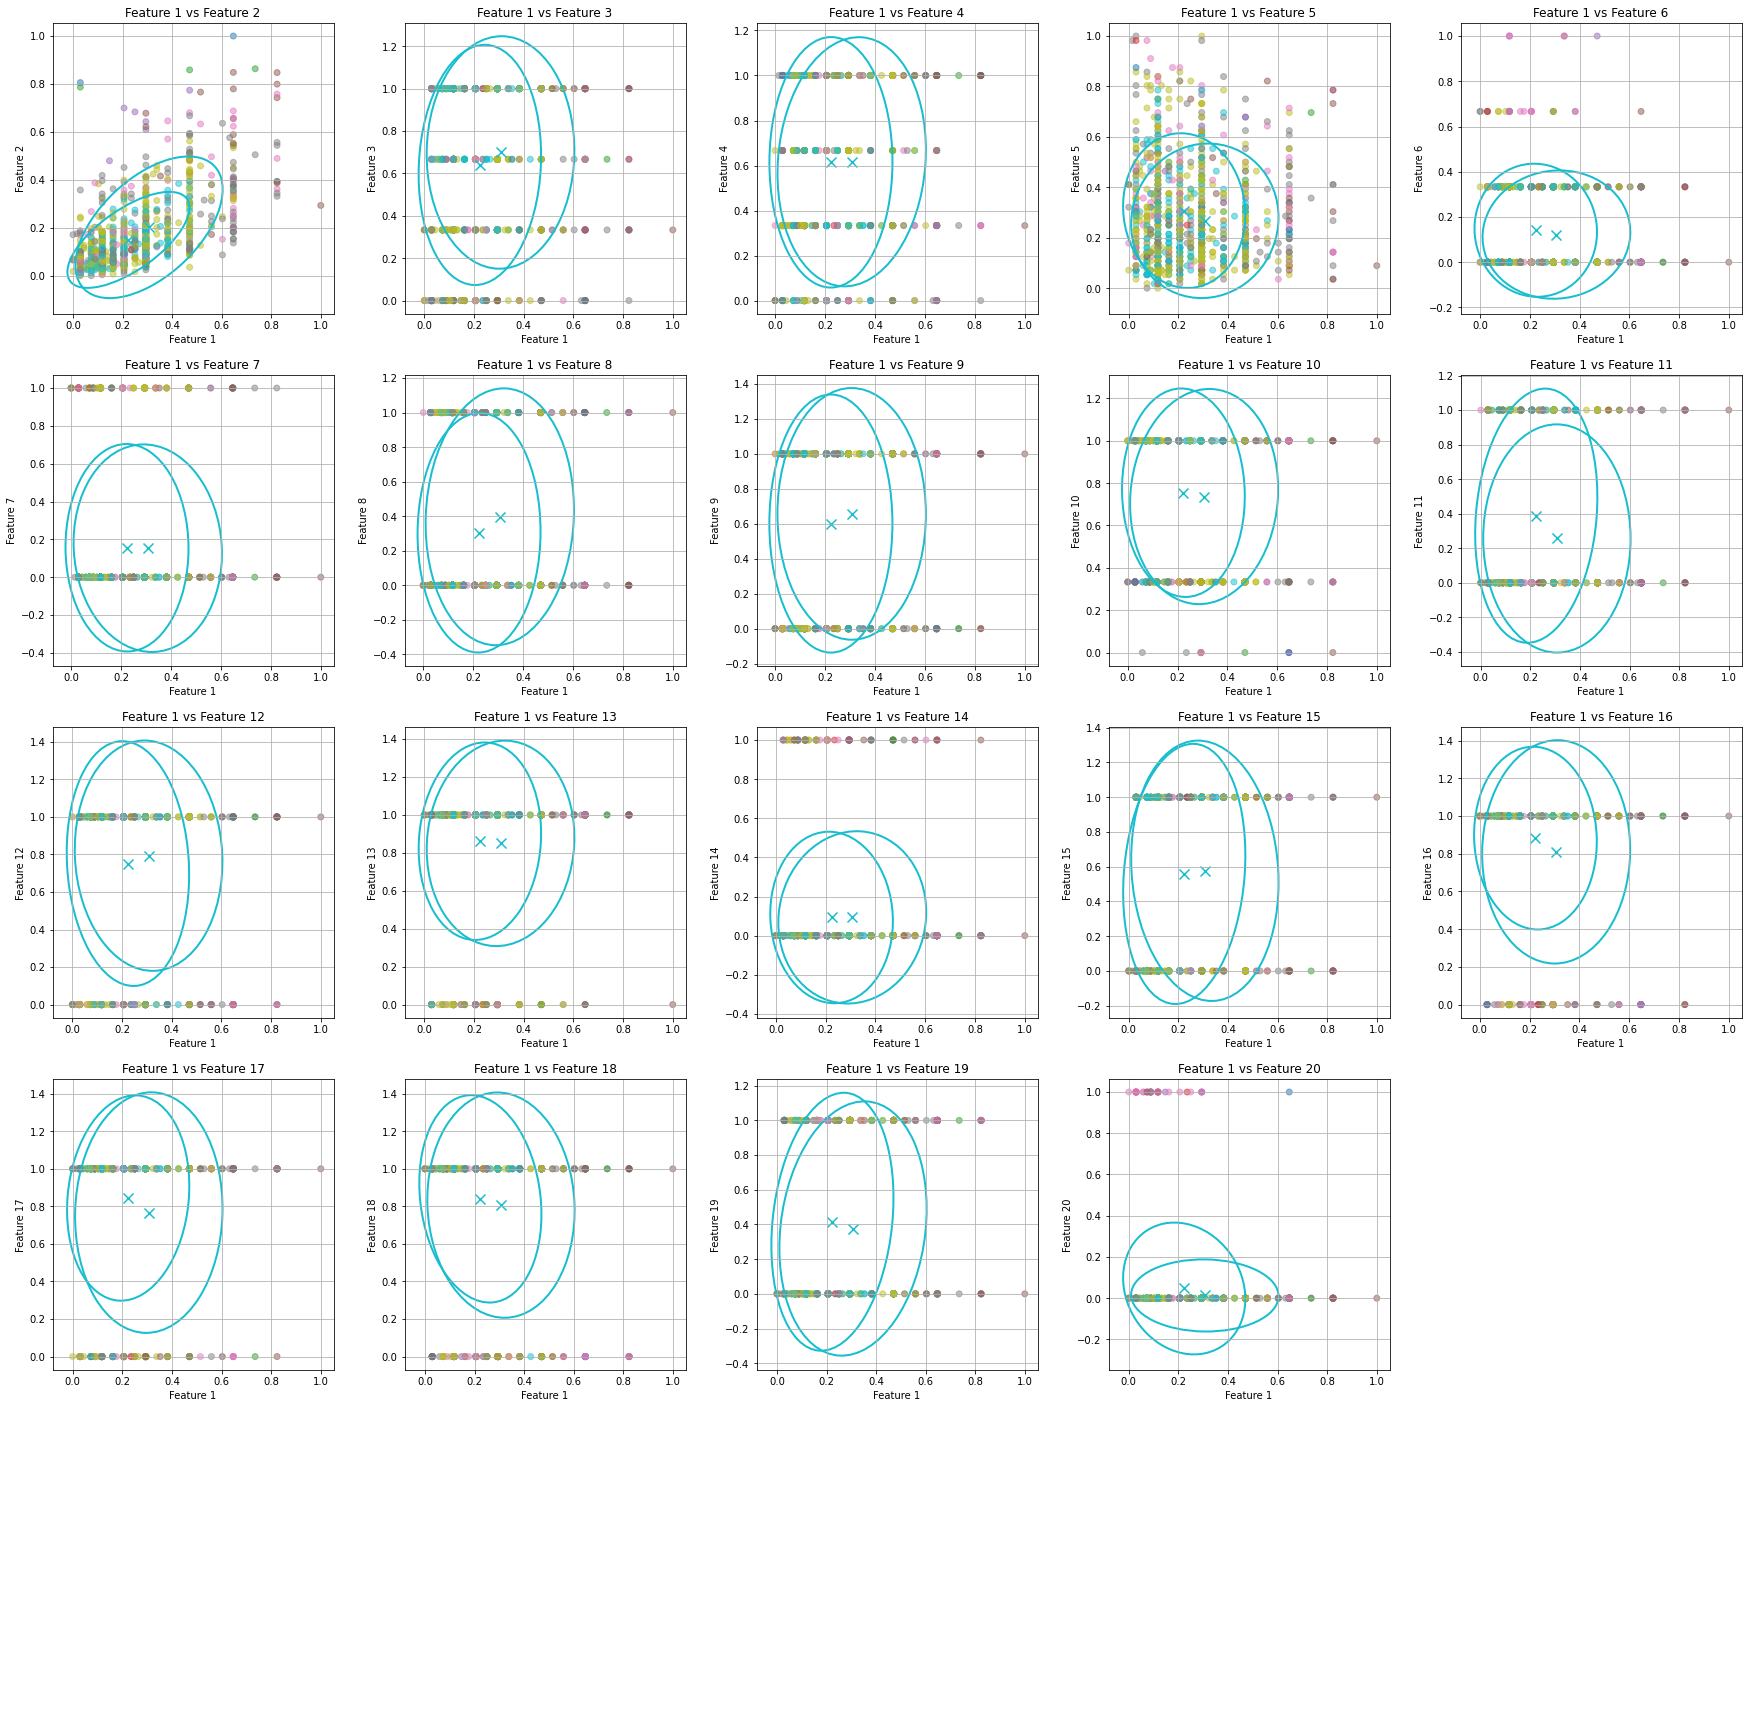

In [ ]:
plot_pairwise_square_grid_filtered_color_gamma_clusters_corrected(X.values, model, N_max)

In [ ]:
def plot_pairwise_square_grid_filtered_color_gamma_distinct(data, model, N_max, colormap='tab10'):
    """Function to assign distinct colors to clusters and color data points based on their maximally activated cluster."""
    n_features = data.shape[1]
    
    # Compute Gamma values for each data point
    gammas = []
    for point in data:
        gamma, _ = model.compute_distance_and_activation(torch.tensor(point).float())  # Ensure point is of type Float
        gammas.append(gamma.detach().numpy())
    gammas = np.array(gammas)
    
    # Extract the dominant cluster index for each data point
    dominant_clusters = np.argmax(gammas, axis=1)
    
    # Assign a unique color to each cluster based on its index
    cluster_colors = cm.get_cmap(colormap)(np.linspace(0, 1, len(model.mu)))
    
    # Map data points to the color of their dominant cluster
    data_colors = [cluster_colors[idx] for idx in dominant_clusters]
    
    # Plotting logic
    feature_combinations = [(0, i) for i in range(1, n_features)]
    num_combinations = len(feature_combinations)
    num_rows = int(np.ceil(np.sqrt(num_combinations)))
    num_cols = num_rows
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.tight_layout(pad=4.0)
    axes = np.array(axes).ravel()
    
    for ax, (f1, f2) in zip(axes, feature_combinations):
        ax.scatter(data[:, f1], data[:, f2], c=data_colors, alpha=0.5)
        
        for idx in range(len(model.mu)):
            if model.n[idx] > N_max:
                mu = model.mu[idx]
                S = model.S[idx]
                mu_val = mu.detach().numpy()
                cov_matrix = (S / model.n[idx]).detach().numpy()
                cov_submatrix = cov_matrix[[f1, f2]][:, [f1, f2]]
                mu_subvector = mu_val[[f1, f2]]
                vals, vecs = np.linalg.eigh(cov_submatrix)
                angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
                factor = 3
                width, height = factor * np.sqrt(vals)
                ell = Ellipse(mu_subvector, width, height, angle, edgecolor=cluster_colors[idx], lw=2, facecolor='none')
                ax.add_patch(ell)
                ax.scatter(mu_subvector[0], mu_subvector[1], color=cluster_colors[idx], s=100, marker='x')
        
        ax.set_title(f"Feature {f1+1} vs Feature {f2+1}")
        ax.set_xlabel(f"Feature {f1+1}")
        ax.set_ylabel(f"Feature {f2+1}")
        ax.grid(True)
    
    for ax in axes[num_combinations:]:
        ax.axis('off')
    
    plt.show()

# The function now assigns a unique color to each cluster and colors data points based on their maximally activated cluster.


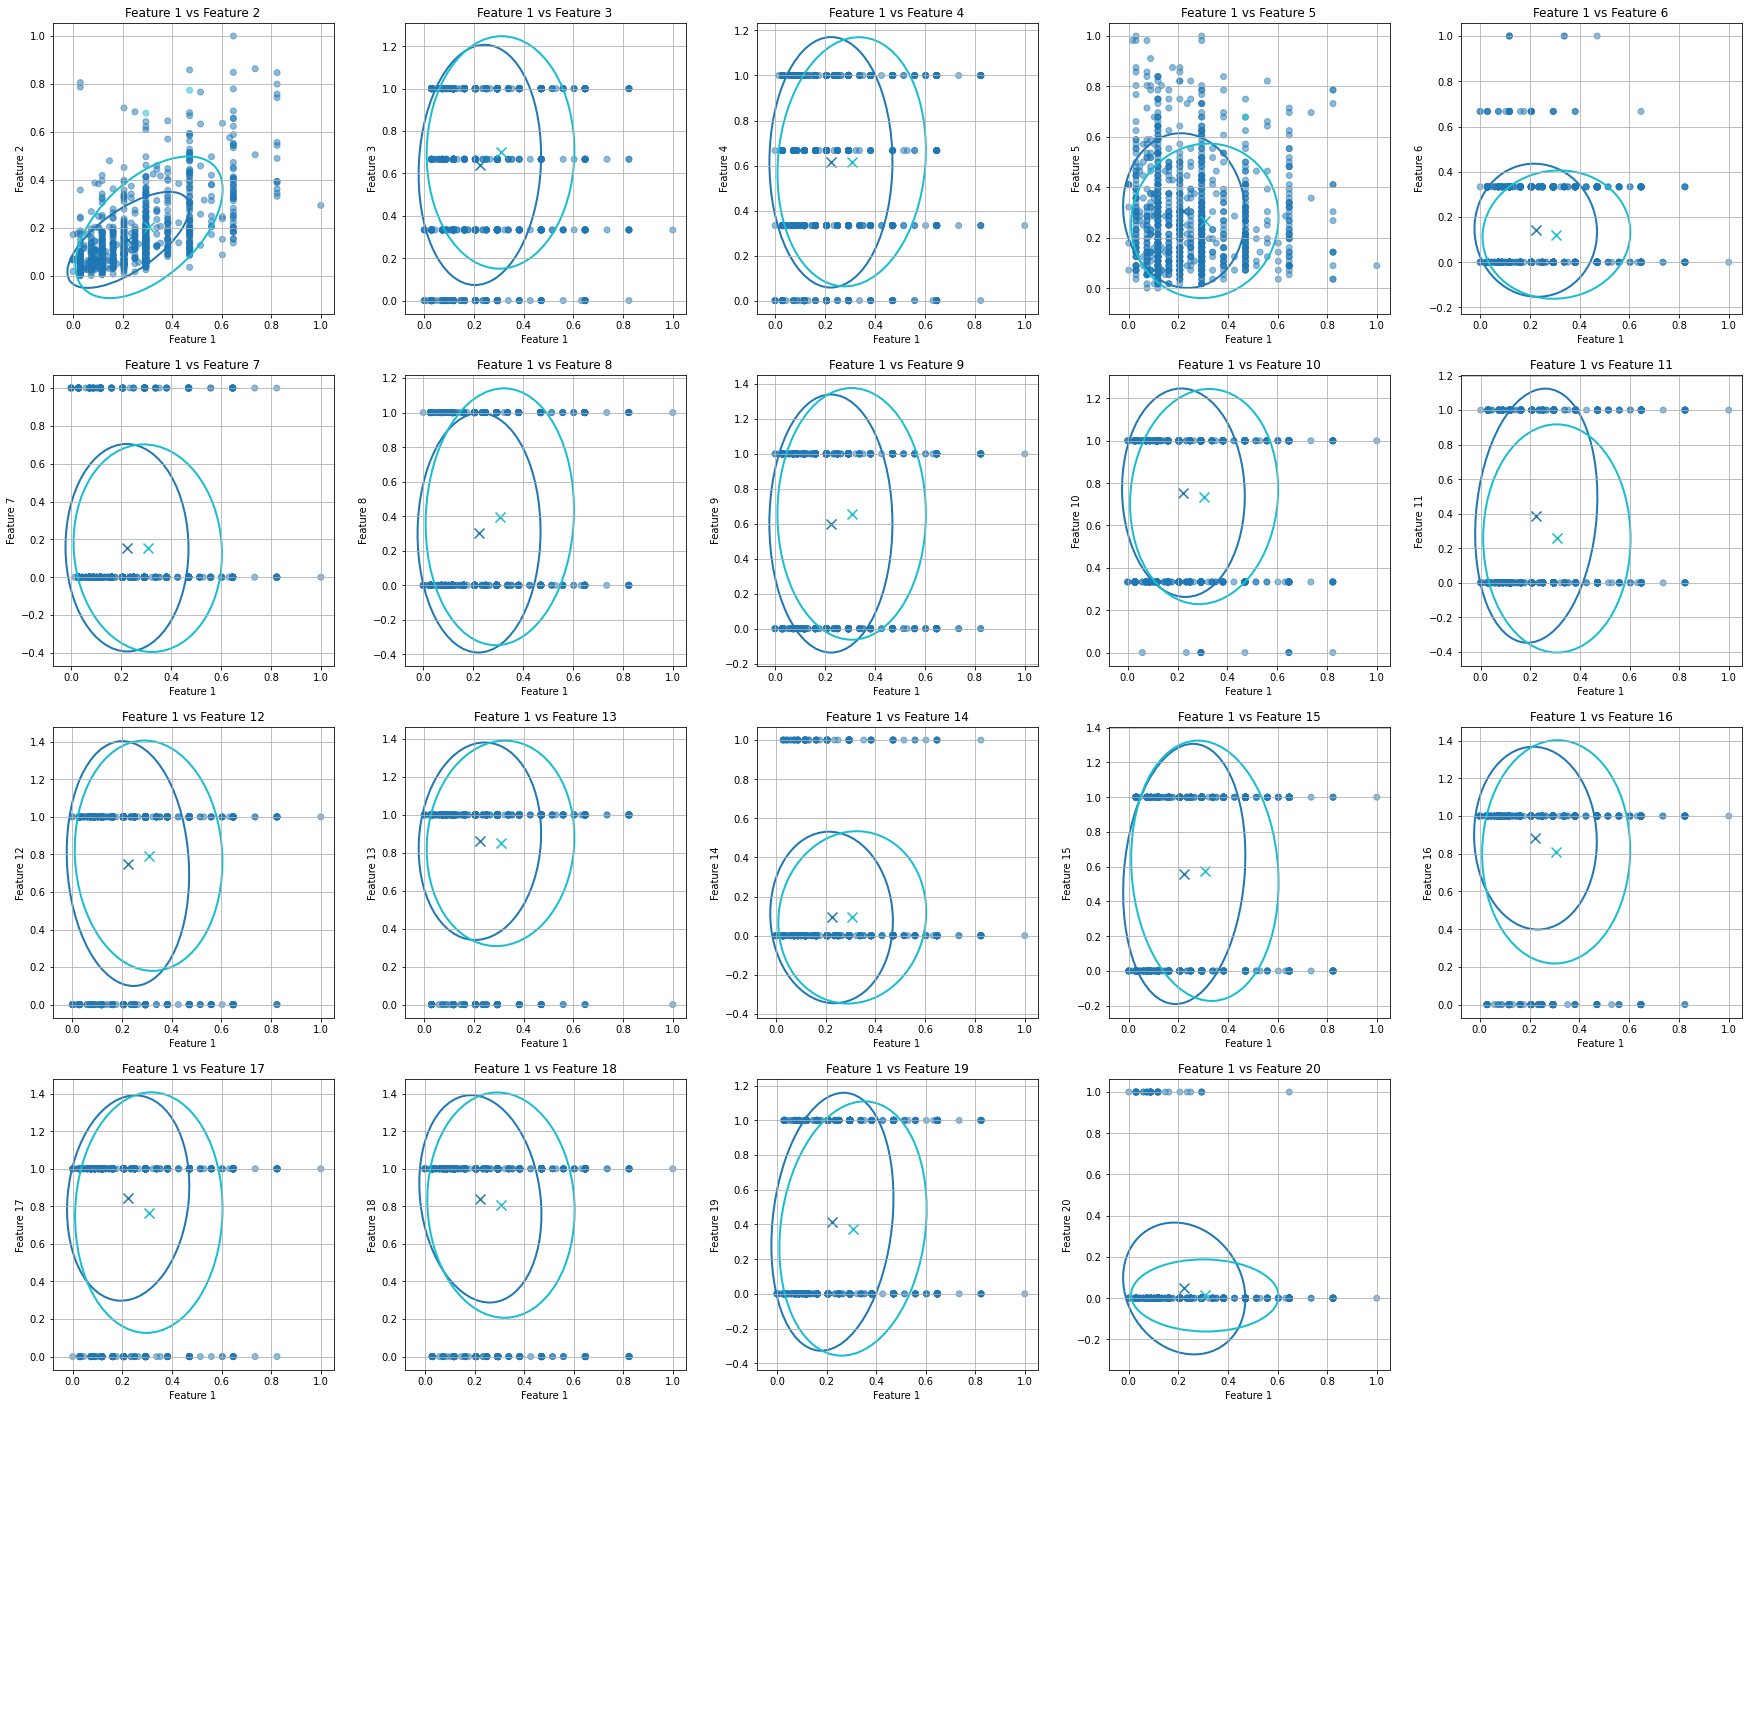

In [ ]:
plot_pairwise_square_grid_filtered_color_gamma_distinct(X.values, model, N_max)